## This is the Base-Decision tree code for COMP472 A1

In [30]:
import os
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<font color=blue>
Two datasets are loaded: the Penguins dataset and the abalone dataset. The numbers in those dataset will be kept the same, but for the training purpose all the string value will be converted to numbers
</font>  <br>
If there's need to convert the string, two methods will be used:  

- i. convert into 1-hot vectors (also known as dummy-coded data): pandas.get_dummies  

- ii. convert these features into categories: pandas.Categorical  

There are two features(string value) in penguins dataset: 'island' and 'sex'

In [31]:
penguins = pd.read_csv('penguins.csv')
# penguins = pd.get_dummies(penguins, columns=['island', 'sex'], prefix=['island', 'sex'])
penguins['island'] = pd.Categorical(penguins['island']).codes
penguins['sex'] = pd.Categorical(penguins['sex']).codes
#print(penguins)

In Abalone dataset, we check if the features columns contain any non-numerical value. If so, we need to convert it to numbers

In [32]:
abalone = pd.read_csv('abalone.csv')
X_a = abalone.drop('Type', axis=1) #the features column
y_a = abalone['Type'] #the output class column
    
for column in X_a.columns: #check if it's necessary to convert any colume in abalone dataset
    print(f"Column Name: {column} is all numerical?: " + str(pd.api.types.is_numeric_dtype(X_a[column])))


Column Name: LongestShell is all numerical?: True
Column Name: Diameter is all numerical?: True
Column Name: Height is all numerical?: True
Column Name: WholeWeight is all numerical?: True
Column Name: ShuckedWeight is all numerical?: True
Column Name: VisceraWeight is all numerical?: True
Column Name: ShellWeight is all numerical?: True
Column Name: Rings is all numerical?: True


#### Plot the percentage of the instances in each output class and store the graphic in files called penguin-classes.gif and abalone-classes.gif.   

From the result we can see that the classes are pretty balanced, which means that accaury will be good to use for evaluation.

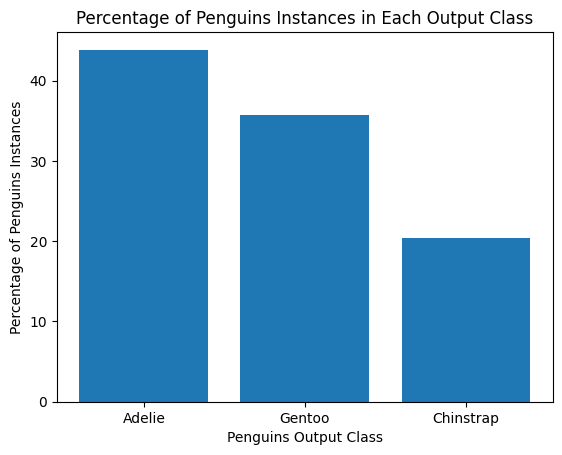

In [33]:
output_counts = penguins['species'].value_counts()
output_percentages = output_counts / len(penguins) * 100

plt.bar(output_percentages.index, output_percentages.values)
plt.xlabel('Penguins Output Class')
plt.ylabel('Percentage of Penguins Instances')
plt.title('Percentage of Penguins Instances in Each Output Class')

# matplotlib doesn't support to save a bar pic directly to gif format 
# So save it first in png format and then use Pillow to save it in gif

plt.savefig('penguin-classes.png')
image = Image.open('penguin-classes.png')
image.save('penguin-classes.gif')

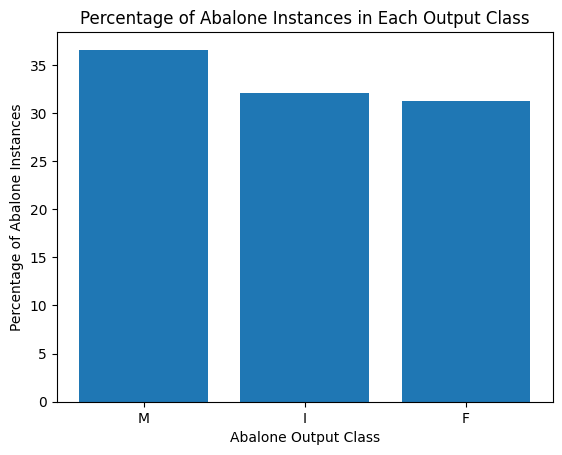

In [34]:
output_counts_a = abalone['Type'].value_counts()
output_percentages_a = output_counts_a / len(abalone) * 100

plt.bar(output_percentages_a.index, output_percentages_a.values)
plt.xlabel('Abalone Output Class')
plt.ylabel('Percentage of Abalone Instances')
plt.title('Percentage of Abalone Instances in Each Output Class')

# matplotlib doesn't support to save a bar pic directly to gif format, so save it first in png format and then use Pillow to save it in gif
plt.savefig('abalone-classes.png')
image = Image.open('abalone-classes.png')
image.save('abalone-classes.gif')

### Split the dataset using train test split using the default parameter values.
The random_state is set to a fixed number to make sure the code will split the dataset the same way every time. If you can remove the random_state variable to make it randomly split each time.

In [35]:
X = penguins.drop('species', axis=1)
y = penguins['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, random_state=42)

### Initialize the array to store the metric values. Those arrays will be used to calculate the average and the variance
We have three in total for each dataset:  
- the average accuracy & the variance  

- average macro-average F1 & the variance  

- average weighted-average F1 & the variance  


In [36]:
#for Penguin dataset:
accuracies = []
macro_f1_scores = []
weighted_f1_scores = []

In [37]:
#for Abalone dataset:
accuracies_a = []
macro_f1_scores_a = []
weighted_f1_scores_a = []

### Create decesion trees with the default parameters and plot the tree:
Create two decision tree instances:

In [38]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc_a = DecisionTreeClassifier(criterion="entropy")

#### This block will be rerun for 5 times to calculate the average metric values in 6.
Training with the Penguins dataset:

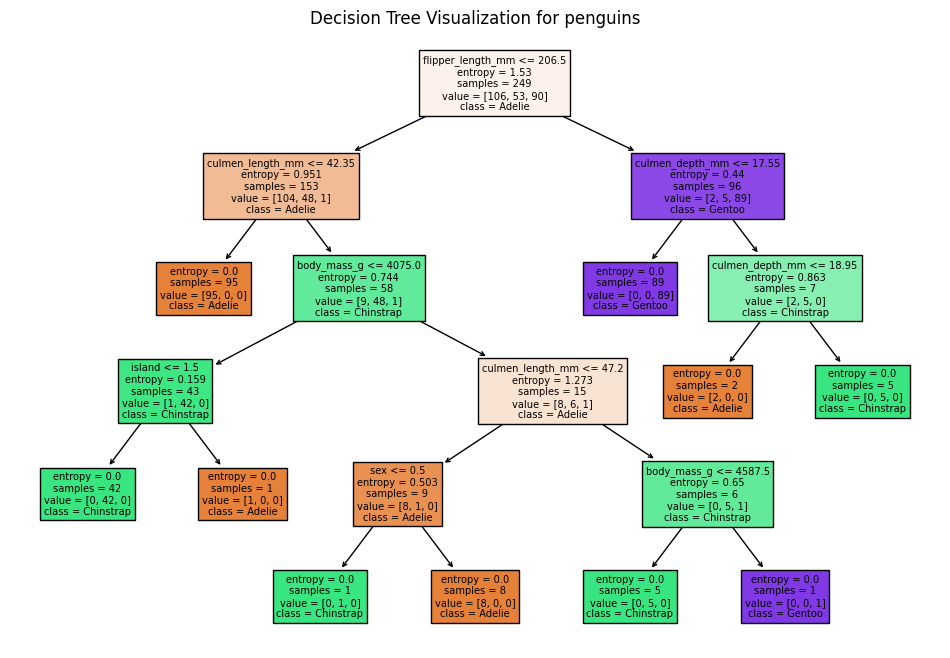

In [63]:
dtc.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in dtc.classes_])
plt.title("Decision Tree Visualization for penguins")
plt.show()

For abalone dataset, since all the parameters are default and the dataset is big, it's very likely that the tree will be complicated and have the problem of over fitting. For human readability, only part of the tree will be plotted (up to the depth 2)

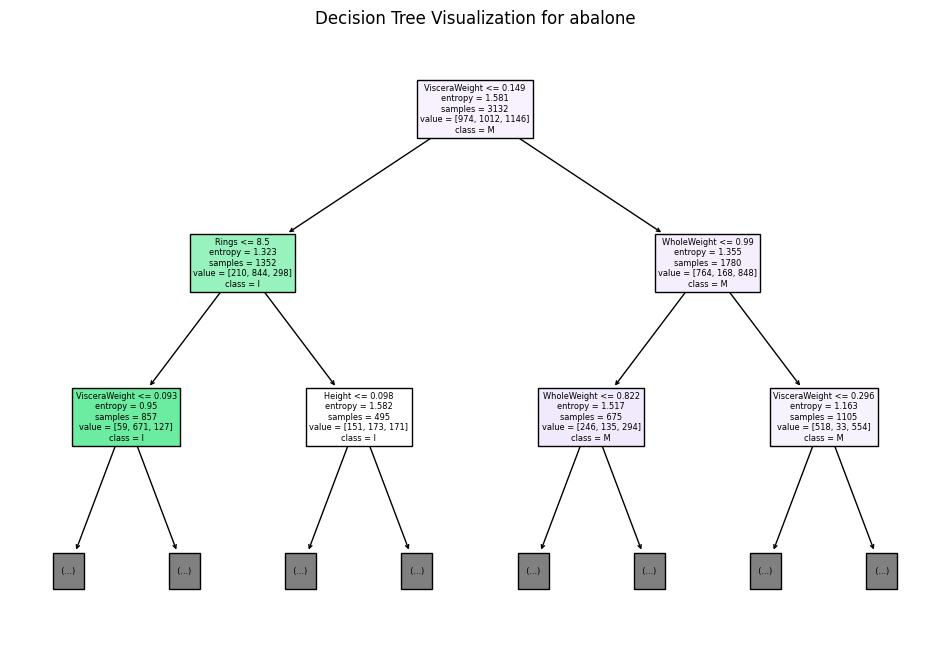

In [94]:
dtc_a.fit(X_train_a, y_train_a)

plt.figure(figsize=(12, 8))
plot_tree(dtc_a, filled=True, feature_names=X_a.columns, class_names=[str(cls) for cls in dtc_a.classes_], max_depth=2)
plt.title("Decision Tree Visualization for abalone")
plt.show()

### Using metrics to evaluate the performance of the model, store the performance in strings which will be written to the performance files:
- penguin-performance.txt   
- abalone-performance.txt

#### The performance files contain:
- (A) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model
- (B) the confusion matrix  
- (C) the precision, recall, and F1-measure for each class  
- (D) the accuracy, macro-average F1 and weighted-average F1 of the model  

#### For the penguins dataset:


In [64]:
y_pred = dtc.predict(X_test) #get the prediction
# (A) Model Information
hyperparameters = dtc.get_params()
model_info = "Base Decision Tree for Penguins(Default Hyperparameters)"
for key in hyperparameters:
    model_info= model_info+'\n'+key+': '+str(hyperparameters[key])

separator = '-' * 40  # Separator
model_info_output = f"{separator}\n(A) {model_info}\n{separator}"

# (B) Confusion Matrix
unique_labels = np.unique(np.concatenate((y_test, y_pred)))  #I tested, the order of values matches with confusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(confusion, index=unique_labels, columns=unique_labels)
confusion_output = f"\n(B) Confusion Matrix for Penguins:\n{confusion_df}\n{separator}"

# (C) Precision, Recall, and F1-measure for each class
classification_rep = classification_report(y_test, y_pred)
classification_rep_output = f"\n(C) Precision, Recall, and F1-measure for Penguins:\n{classification_rep}\n{separator}"

# (D) Accuracy, Macro-average F1, and Weighted-average F1
accuracy = accuracy_score(y_test, y_pred)
macro_f1 = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
weighted_f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
performance_output = f"\n(D) Accuracy for Penguins: {accuracy}\nMacro-average F1: {macro_f1}\nWeighted-average F1: {weighted_f1}\n{separator}"

#### For penguins: Print the performance information that will be writtin into txt file:

In [65]:
print(model_info_output)
print(confusion_output)
print(classification_rep_output)
print(performance_output)

----------------------------------------
(A) Base Decision Tree for Penguins(Default Hyperparameters)
ccp_alpha: 0.0
class_weight: None
criterion: entropy
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: None
splitter: best
----------------------------------------

(B) Confusion Matrix for Penguins:
           Adelie  Chinstrap  Gentoo
Adelie         39          1       0
Chinstrap       1         14       0
Gentoo          0          0      29
----------------------------------------

(C) Precision, Recall, and F1-measure for Penguins:
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        40
   Chinstrap       0.93      0.93      0.93        15
      Gentoo       1.00      1.00      1.00        29

    accuracy                           0.98        84
   macro avg       0.97      0.97      0.97        84
weighted avg

#### For penguins: Write the performance into the txt file:

In [66]:
with open('penguin-performance.txt', 'a') as performance_file:
    performance_file.write(model_info_output)
    performance_file.write(confusion_output)
    performance_file.write(classification_rep_output)
    performance_file.write(performance_output)

#### For penguins: Calculate the avarage metric values and the variance

In [67]:
accuracies.append(accuracy)
macro_f1_scores.append(macro_f1)
weighted_f1_scores.append(weighted_f1)

In [68]:
print(accuracies)
print(macro_f1_scores)
print(weighted_f1_scores)

avg_accuracy = np.mean(accuracies)
variance_accuracy = np.var(accuracies)

avg_macro_f1 = np.mean(macro_f1_scores)
variance_macro_f1 = np.var(macro_f1_scores)

avg_weighted_f1 = np.mean(weighted_f1_scores)
variance_weighted_f1 = np.var(weighted_f1_scores)

[0.9761904761904762, 0.9761904761904762, 0.9761904761904762, 0.9761904761904762, 0.9761904761904762]
[0.9694444444444444, 0.9694444444444444, 0.9694444444444444, 0.9694444444444444, 0.9694444444444444]
[0.9761904761904762, 0.9761904761904762, 0.9761904761904762, 0.9761904761904762, 0.9761904761904762]


#### For penguins: Attach the avarage metric values and the variance to the performance file

In [102]:
results=[]
results.append({
    'Metric': 'Average Accuracy',
    'Value': avg_accuracy,
    'Variance': variance_accuracy
})
results.append({
    'Metric': 'Average Macro-average F1',
    'Value': avg_macro_f1,
    'Variance': variance_macro_f1
})
results.append({
    'Metric': 'Average Weighted-average F1',
    'Value': avg_weighted_f1,
    'Variance': variance_weighted_f1
})

results_df = pd.DataFrame(results)
results_output = f"\n(E) Base-DT Average Performance for Penguins:\n{results_df}\n{separator}"
with open('penguin-performance.txt', 'a') as performance_file:
    performance_file.write(results_output)

#### For the Abalone dataset:

In [95]:
y_pred_a = dtc_a.predict(X_test_a)
# (A) Model Information
hyperparameters_a = dtc_a.get_params()
model_info_a = "Base-Decision Tree for abalone(Default Hyperparameters)"
for key in hyperparameters_a:
    model_info_a= model_info_a+'\n'+key+': '+str(hyperparameters_a[key])

separator = '-' * 40  # Separator
model_info_output_a = f"{separator}\n(A) {model_info_a}\n{separator}"

# (B) Confusion Matrix
unique_labels_a = np.unique(np.concatenate((y_test_a, y_pred_a)))  #I tested, the order of values matches with confusion matrix
confusion_a = confusion_matrix(y_test_a, y_pred_a)
confusion_df_a = pd.DataFrame(confusion_a, index=unique_labels_a, columns=unique_labels_a) 
confusion_output_a = f"\n(B) Confusion Matrix for Abalone:\n{confusion_df_a}\n{separator}"

# (C) Precision, Recall, and F1-measure for each class
classification_rep_a = classification_report(y_test_a, y_pred_a)
classification_rep_output_a = f"\n(C) Precision, Recall, and F1-measure for Abalone:\n{classification_rep_a}\n{separator}"

# (D) Accuracy, Macro-average F1, and Weighted-average F1
accuracy_a = accuracy_score(y_test_a, y_pred_a)
macro_f1_a = classification_report(y_test_a, y_pred_a, output_dict=True)['macro avg']['f1-score']
weighted_f1_a = classification_report(y_test_a, y_pred_a, output_dict=True)['weighted avg']['f1-score']
performance_output_a = f"\n(D) Accuracy for Abalone: {accuracy_a}\nMacro-average F1: {macro_f1_a}\nWeighted-average F1: {weighted_f1_a}\n{separator}"

#### For Abalone: Print the performance information that will be writtin into txt file:

In [96]:
print(model_info_output_a)
print(confusion_output_a)
print(classification_rep_output_a)
print(performance_output_a)

----------------------------------------
(A) Decision Tree for abalone(Default Hyperparameters)
ccp_alpha: 0.0
class_weight: None
criterion: entropy
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: None
splitter: best
----------------------------------------

(B) Confusion Matrix for Abalone:
     F    I    M
F  129   51  153
I   47  209   74
M  132   72  178
----------------------------------------

(C) Precision, Recall, and F1-measure for Abalone:
              precision    recall  f1-score   support

           F       0.42      0.39      0.40       333
           I       0.63      0.63      0.63       330
           M       0.44      0.47      0.45       382

    accuracy                           0.49      1045
   macro avg       0.50      0.50      0.50      1045
weighted avg       0.49      0.49      0.49      1045

----------------------------------------

(D)

#### For Abalone: Write the performance into the txt file:

In [97]:
# Append all the information to the text file
with open('abalone-performance.txt', 'a') as performance_file:
    performance_file.write(model_info_output_a)
    performance_file.write(confusion_output_a)
    performance_file.write(classification_rep_output_a)
    performance_file.write(performance_output_a)

#### For Abalone: Calculate the avarage metric values and the variance

In [98]:
accuracies_a.append(accuracy_a)
macro_f1_scores_a.append(macro_f1_a)
weighted_f1_scores_a.append(weighted_f1_a)

In [99]:
print(accuracies_a)
print(macro_f1_scores_a)
print(weighted_f1_scores_a)

avg_accuracy_a = np.mean(accuracies_a)
variance_accuracy_a = np.var(accuracies_a)

avg_macro_f1_a = np.mean(macro_f1_scores_a)
variance_macro_f1_a = np.var(macro_f1_scores_a)

avg_weighted_f1_a = np.mean(weighted_f1_scores_a)
variance_weighted_f1_a = np.var(weighted_f1_scores_a)

[0.48038277511961724, 0.48229665071770333, 0.48038277511961724, 0.48708133971291867, 0.4937799043062201]
[0.48331732384003057, 0.483348488100827, 0.4817390019367043, 0.49013473879464725, 0.4954222460924833]
[0.48054583089439074, 0.4817246663614291, 0.4793692941758805, 0.4873834904537139, 0.4930121993029895]


#### For Abalone: Attach the avarage metric values and the variance to the performance file

In [101]:
results_a=[]
results_a.append({
    'Metric': 'Average Accuracy',
    'Value': avg_accuracy_a,
    'Variance': variance_accuracy_a
})
results_a.append({
    'Metric': 'Average Macro-average F1',
    'Value': avg_macro_f1_a,
    'Variance': variance_macro_f1_a
})
results_a.append({
    'Metric': 'Average Weighted-average F1',
    'Value': avg_weighted_f1_a,
    'Variance': variance_weighted_f1_a
})

results_df_a = pd.DataFrame(results_a)
results_output_a = f"\n(E) Base-DT Average Performance for Abalone:\n{results_df_a}\n{separator}"
with open('abalone-performance.txt', 'a') as performance_file:
    performance_file.write(results_output_a)